In [1]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
from scipy.fft import fft, fftfreq
from scipy.fftpack import fftshift, ifftshift
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import IntRangeSlider, widgets, Layout, HBox, VBox
from IPython.display import display, clear_output
print("Libraries added successfully!")

Libraries added successfully!


In [2]:
s=2
print('s =',s)

s = 2


In [3]:
v=np.array([1,5,9])
print('v =',v)

v = [1 5 9]


In [4]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
print('a =',a)

a = [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
a+5

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [6]:
b=s*v*2
print('b=',b)

b= [ 4 20 36]


In [7]:
np.multiply(v,b)

array([  4, 100, 324])

In [8]:
len(v)

3

In [9]:
a.shape   # για array: np.array(a.shape)

(3, 3)

In [10]:
a[0,1] # Η δεικτοδότηση αρχίζει από το 0

2

In [11]:
a[1,-1] # Αρνητικές τιμές μετρούν από το τέλος, π.χ. το -1 αναφέρεται στο τελευταίο στοιχείο

6

In [12]:
v1 = v[1:3]
v2 = v[1:2]
print('v1 =',v1)
print('v2 =',v2)
# ΠΡΟΣΟΧΗ: τα στοιχεία [2ο,3ο] δίνονται ως 1:3 και όχι ως 1:2

v1 = [5 9]
v2 = [5]


In [13]:
a[0:2,:] # Ομοίως: οι γραμμές 1 & 2 δίνονται ως 0:2 και όχι ως 0:1

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
t=np.arange(0,0.5,0.1)
print('t=',t)

t= [0.  0.1 0.2 0.3 0.4]


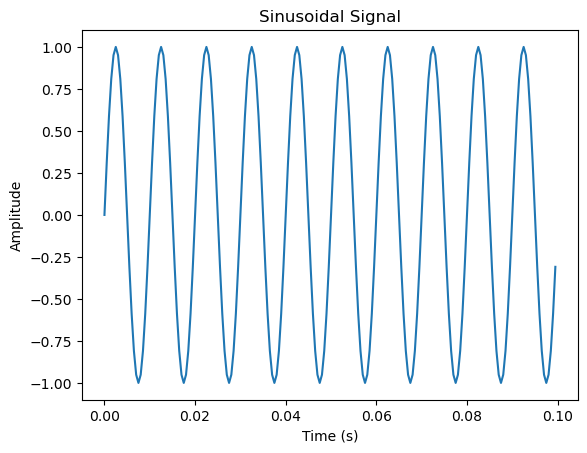

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 2.1 Create a Sinusoidal Signal
# ==============================================================================
Fs = 2000                  # Sampling frequency in Hz
Ts = 1 / Fs                # Sampling period in seconds
T = 0.1                    # Signal duration in seconds
t = np.arange(0, T, Ts)    # Time vector for signal
A = 1                      # Signal amplitude
x = A * np.sin(2 * np.pi * 100 * t)  # Generate sinusoidal signal
L = len(x)                 # Length of the signal

# Plot the sinusoidal signal in time domain
plt.figure()
plt.plot(t, x)
plt.title('Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show(block=False)

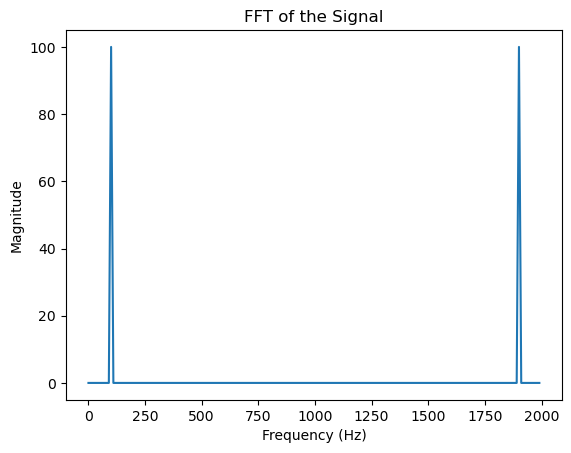

In [16]:
# ==============================================================================
# 2.2 Plot Fourier Transform (FT) of the Signal
# ==============================================================================
N = 1 * L                  # Length of Fourier Transform
Fo = Fs / N                # Frequency resolution
Fx = np.fft.fft(x, N)      # Discrete Fourier Transform (DFT) of the signal
freq = np.arange(0, N) * Fo  # Frequency vector

# Plot the magnitude of the DFT
plt.figure()
plt.plot(freq, np.abs(Fx))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show(block=False)


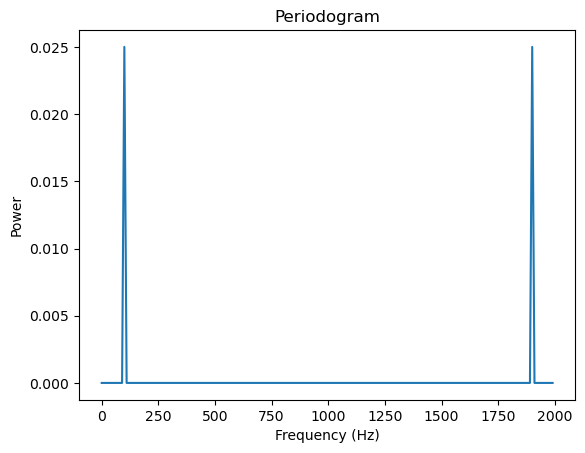

In [17]:
# ==============================================================================
# 2.3 Plot Signal Periodogram
# ==============================================================================
power = ((Fx * np.conj(Fx)) / (Fs * L)).real  # Calculate spectral density

plt.figure()
plt.plot(freq, power)
plt.title('Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show(block=False)

In [18]:
# ==============================================================================
# 2.4 Calculate Signal Power
# ==============================================================================
power_theory = A**2 / 2                # Theoretical power based on signal amplitude
dB = 10 * np.log10(power_theory)       # Convert power to decibels (dB)
power_time_domain = np.sum(np.abs(x)**2) / L  # Calculate power in time domain
power_frequency_domain = np.sum(power * Fo).real  # Calculate power in frequency domain

# Display calculated power values
print(f'Power (Theory): {power_theory}')
print(f'Power (dB): {dB}')
print(f'Power (Time Domain): {power_time_domain}')
print(f'Power (Frequency Domain): {power_frequency_domain}')

Power (Theory): 0.5
Power (dB): -3.010299956639812
Power (Time Domain): 0.5000000000000001
Power (Frequency Domain): 0.5000000000000001


In [19]:
# Callback function to update graphs
# Updated callback function to accept three frequency inputs

# Create three IntText widgets for input frequencies
freq1_input = widgets.IntText(value=500, description='Freq 1 (Hz):', continuous_update=False)
freq2_input = widgets.IntText(value=1000, description='Freq 2 (Hz):', continuous_update=False)
freq3_input = widgets.IntText(value=2000, description='Freq 3 (Hz):', continuous_update=False)



def update_graph(freq1, freq2, freq3):
    Fs = 8000  # Hardcoded for simplicity, adjust as needed
    Ts = 1 / Fs
    L = Fs
    T = L * Ts
    t = np.arange(0, L) * Ts  # Adjusted to include the last sample

    

    
    global new_x
    new_x = np.sin(2 * np.pi * freq1 * t) \
            + 0.8 * np.sin(2 * np.pi * freq2 * t) \
            + np.sin(2 * np.pi * freq3 * t)

    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))
    
    # Calculate the midpoint of the arrays
    point = len(new_x) // 10

    # Plotting only the first half of new_x
    axs[0].plot(t[:point], new_x[:point], color='#00CC96')
    axs[0].set_title('Time domain plot of x')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

  
    
    # Fourier transform
    def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n

    N = nextpow2(L)                 # Length of Fourier transform
    Fo = Fs / N                     # Frequency resolution
    f = np.arange(0, N) * Fo        # Frequency vector
    X = np.fft.fft(new_x, N)            # Compute DFT for N points

    # Frequency domain plot
    axs[1].plot(f[1:N], abs(X[1:N]), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    # Shift frequencies to center
    f = f - Fs / 2
    X = np.fft.fftshift(X)

    # Two-sided spectrum of x
    f_shifted = f 

    # Two-sided spectrum plot
    axs[2].plot(f_shifted, abs(X), color='#1F77B4')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('f (Hz)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)

    # Calculate power
    power = np.multiply(X, np.conj(X)) / N / L

    # Periodogram plot
    axs[3].plot(f_shifted, power.real, color='#1F77B4')
    axs[3].set_title('Periodogram')
    axs[3].set_xlabel('Frequency (Hz)')
    axs[3].set_ylabel('Power')
    axs[3].grid(True)

    plt.tight_layout()
    plt.show()




ui = widgets.VBox([freq1_input, freq2_input, freq3_input])

# Adjusted to map the new frequency inputs
out = widgets.interactive_output(update_graph, {'freq1': freq1_input, 'freq2': freq2_input, 'freq3': freq3_input})

# Display the widgets and output
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [20]:
# Function to calculate the next highest power of 2
def nextpow2(i):
    n = 1
    count = 0
    while n < i:
        n *= 2
        count += 1
    return count

# Updated function to accept three frequency inputs
def update_plots(freq1, freq2, freq3):
    Fs = 8000                    # Sampling frequency
    Ts = 1/Fs                    # Sampling period
    L = 8000                     # Length of signal (number of samples)
    T = L * Ts                   # Duration of signal
    t = np.arange(0, L) * Ts     # Time vector, adjusted to include the last sample

    # Create the signal using the three input frequencies
    new_x = np.sin(2*np.pi*freq1*t) + 0.8*np.sin(2*np.pi*freq2*t) + np.sin(2*np.pi*freq3*t)
    rand_n = np.random.randn(len(new_x))  # Generate random noise

    # Plotting setup
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))
    
    # Time domain plot of n
    axs[0].plot(t, rand_n, color='#00CC96')
    axs[0].set_title('Time domain plot of n')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Correction for N calculation using bitwise operator
    N = 2**nextpow2(L)  # Corrected the exponentiation operator
    Fo = Fs / N   
    f = np.arange(0, N) * Fo
    f_shifted = f - Fs/2
    rand_N = np.fft.fft(rand_n, N)
    rand_N = np.fft.fftshift(rand_N)
    power_n = np.multiply(rand_N, np.conj(rand_N)) / N / L
    
    # Frequency domain plot of x
    axs[1].plot(f_shifted, power_n.real, color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)
    
    # Two sided spectrum of x
    s = new_x + rand_n
    axs[2].plot(t, s, color='#00CC96')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('t (sec)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)
    
    # Two sided spectrum of s
    S = np.fft.fft(s, N)
    S = np.fft.fftshift(S)
    axs[3].plot(f_shifted, np.abs(S), color='#1F77B4')
    axs[3].set_title('Two sided spectrum of s')
    axs[3].set_xlabel('f (Hz)')
    axs[3].set_ylabel('Magnitude')
    axs[3].grid(True)
    
    plt.tight_layout()
    plt.show()

# Create three IntText widgets for input frequencies
freq1_input = widgets.IntText(value=500, description='Freq 1 (Hz):', continuous_update=False)
freq2_input = widgets.IntText(value=1000, description='Freq 2 (Hz):', continuous_update=False)
freq3_input = widgets.IntText(value=2000, description='Freq 3 (Hz):', continuous_update=False)

# Display the input boxes and output
ui = widgets.VBox([freq1_input, freq2_input, freq3_input])

# Adjusted to map the new frequency inputs
out = widgets.interactive_output(update_plots, {'freq1': freq1_input, 'freq2': freq2_input, 'freq3': freq3_input})

# Display the UI
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [21]:
# Calculate the next highest power of 2
# Function to calculate the next highest power of 2
def nextpow2(i):
    n = 1
    count = 0
    while n < i:
        n *= 2
        count += 1
    return count

# Function to update plots with input frequencies
def update_plots(freq1, freq2, freq3):
    Fc = 1500  # Carrier frequency
    Fs = 8000  # Sampling frequency
    Ts = 1 / Fs  # Sampling period
    L = int(Fs)  # Length of signal, approximated to Fs for a 1-second signal
    t = np.linspace(0, 1, L, endpoint=False)  # Time vector

    # Create the composite signal s
    s = np.sin(2 * np.pi * freq1 * t) + 0.8 * np.sin(2 * np.pi * freq2 * t) + np.sin(2 * np.pi * freq3 * t)
    # Create the carrier signal z
    z = np.sin(2 * np.pi * Fc * t)
    # Modulating signal
    y = s * z

    # Plotting the modulated signal in time domain
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))
    


    # Calculate the midpoint of the arrays
    axs[0].plot(t, y, color='#00CC96')
    axs[0].set_title('Time domain plot of modulated signal y')
    axs[0].set_xlabel('Time (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_xlim(0, 0.2)
    axs[0].set_ylim(-2, 2)
    axs[0].grid(True)

    # Fourier transform
    N = 2 ** nextpow2(L)
    Y = np.fft.fft(y, N)
    Y = np.fft.fftshift(Y)
    f = np.linspace(-Fs/2, Fs/2, N)
    
    # Frequency domain plot
    axs[1].plot(f, np.abs(Y), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of modulated signal y')
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Widgets for frequency input
freq1_input = widgets.IntText(value=500, description='Freq 1 (Hz):', continuous_update=False)
freq2_input = widgets.IntText(value=1000, description='Freq 2 (Hz):', continuous_update=False)
freq3_input = widgets.IntText(value=1500, description='Freq 3 (Hz):', continuous_update=False)

# Display the input widgets
ui = widgets.VBox([freq1_input, freq2_input, freq3_input])

# Adjusted to map the new frequency inputs
out = widgets.interactive_output(update_plots, {'freq1': freq1_input, 'freq2': freq2_input, 'freq3': freq3_input})

# Display the UI
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [22]:
def nextpow2(i):
    n = 1
    while n < i: n *= 2
    return n

def pwelch(x,Fs):                    
    Ts=1/Fs                    
    L=np.size(x)+1     
    print("L =",L)            
    T=L*Ts                     
    N = 2^nextpow2(L)
    Fo=Fs/N                   
    f=np.arange(0,N)*Fo       
        
    window_size = nextpow2(np.size(x)/8)
    if (window_size<256):
        window_size=256
    windows = np.size(x)//(window_size//2)-1
    indexer = np.arange(window_size)[None, :] + (window_size//2)*np.arange(windows)[:, None]
    windowed_x = x[indexer]

    avg_pwr=0
    for window in windowed_x:
        window = window * np.hanning(np.size(window))
        L=np.size(window)+1                 
        T=L*Ts                     
        N = 2^nextpow2(L)
        Fo=Fs/N                   
        f=np.arange(0,N)*Fo
        window_fft=np.fft.fft(window,N)
        power=np.multiply(window_fft,np.conj(window_fft))/N/L
        avg_pwr=avg_pwr+power
    avg_pwr=avg_pwr/windows


    return f[np.arange(0,N//2)], avg_pwr[np.arange(0,N//2)]

# Function to update plots based on slider value
def update_plots(Fs):
    L = 1000
    T = 1 / Fs  # Update sampling period
    t1 = np.arange(0, L) * T  # Update time vector
    
    # Recompute signal x with new sampling frequency
    last_x = np.sin(2 * np.pi * 30 * t1) + 0.8 * np.sin(2 * np.pi * 80 * (t1 - 2)) + np.sin(2 * np.pi * 60 * t1)
    
    # Compute pwelch
    f1, Pxx1 = pwelch(last_x, Fs)
    
    # Compute signal.welch
    f2, Pxx2 = signal.welch(last_x, fs=Fs)
    
    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot custom pwelch
    axs[0].plot(f1, Pxx1)
    axs[0].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram pwelch()')
    axs[0].grid()
    
    # Plot signal.welch
    axs[1].plot(f2, Pxx2)
    axs[1].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram signal.welch()')
    axs[1].grid()
    
    plt.tight_layout()

# Create slider for Fs
Fs_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=2000, 
    step=100,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}, 
    continuous_update=False
)


html_label = widgets.HTML(
    value="""
    
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, Fs_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'Fs': Fs_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)

Output()